# Import Libraries

In [161]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Load dataset & analyse data

In [162]:
# Load dataset
df = pd.read_csv('resale_car_price.csv',header=0, skipinitialspace=True)

# Drop rows with missing values
df = df.dropna()

'''
Recognising our goal. The aim is to predict car resale price using data in the excel sheet.
As we know name does not have any impact on car resale price, I will remove it.
'''
df = df.drop(['name'],axis=1) #name not important

# Explore dataset
print(df.columns) #show data columns
print(df.head()) #show first 5 data
print(df.info()) #show info on data
print(df.describe()) #show descriptive statistics
print(df.dtypes) #show data types

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'torque', 'rpm'],
      dtype='object')
   year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  seats  torque   rpm  
0   First Owner    23.40  1248.0      74.00    5.0     190  2000  
1  Second Owner    21.14  1498.0     103.52    5.0     250  2500  
2   Third Owner    17.70  1497.0      78.00    5.0  124.46  2700  
3   First Owner    23.00  1396.0      90.00    5.0  219.52  2750  
4   First Owner    16.10  1298.0      88.20    5.0   1

# Convert data types

In [163]:
# Noticed that torque and rpm are listed as object when they should not be
# so we perform conversion
df['torque'] = pd.to_numeric(df['torque'], errors='coerce') #convert 'torque' and 'rpm' columns to proper data type
df['rpm'] = pd.to_numeric(df['rpm'], errors='coerce')
df = df.dropna()

# Print the data types of the columns after conversion
print(df.dtypes)


year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
torque           float64
rpm              float64
dtype: object


In [178]:
print(df.isnull().sum())
df = df.dropna(subset=['torque', 'rpm'])
print(df[['torque', 'rpm']].isnull().sum())

year                            0
selling_price                   0
km_driven                       0
mileage                         0
engine                          0
max_power                       0
seats                           0
torque                          0
rpm                             0
encoded_CNG                     0
encoded_Diesel                  0
encoded_LPG                     0
encoded_Petrol                  0
encoded_Dealer                  0
encoded_Individual              0
encoded_Trustmark Dealer        0
encoded_Automatic               0
encoded_Manual                  0
encoded_First Owner             0
encoded_Fourth & Above Owner    0
encoded_Second Owner            0
encoded_Test Drive Car          0
encoded_Third Owner             0
encoded_year                    0
dtype: int64
torque    0
rpm       0
dtype: int64


<AxesSubplot:>

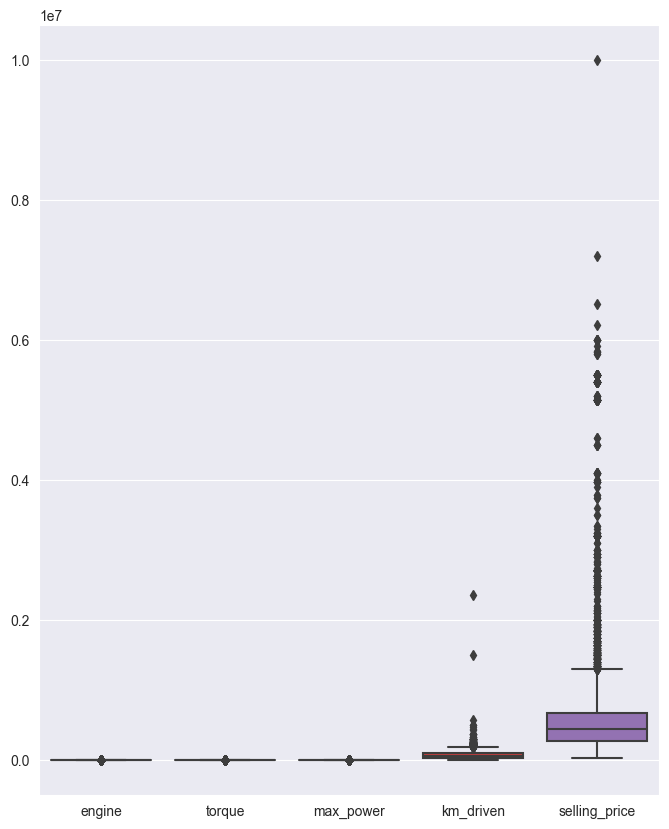

In [164]:
# Univariate
import seaborn as sns
sns.boxplot(data=selected_data)

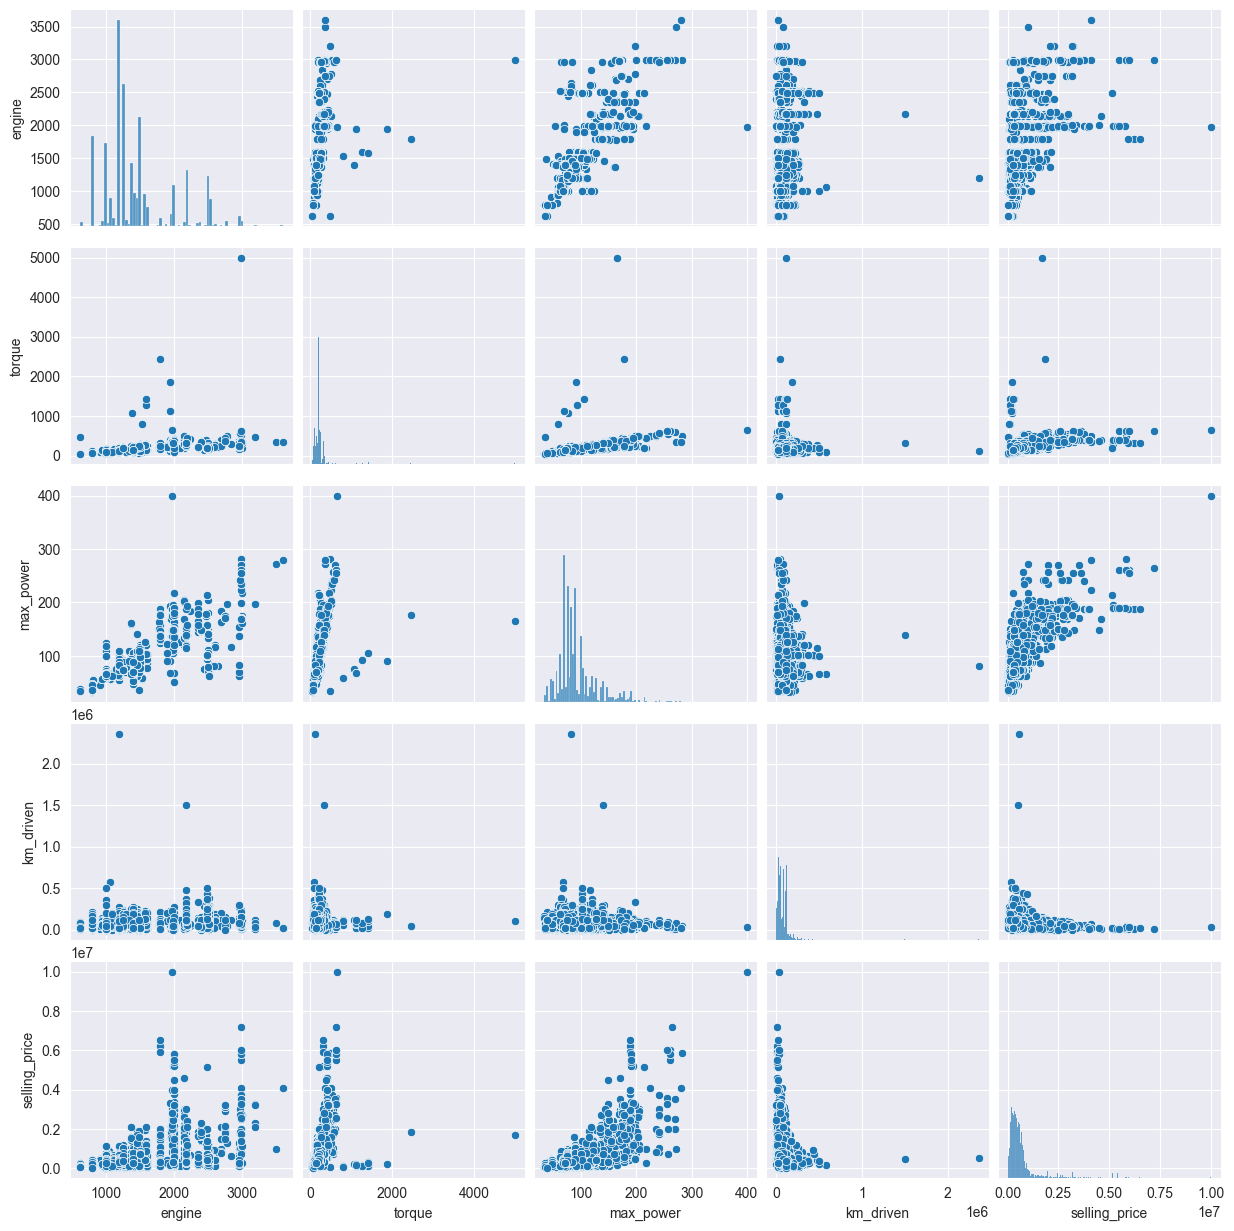

In [165]:
# Multivariate
sns.pairplot(data=selected_data)
plt.show()

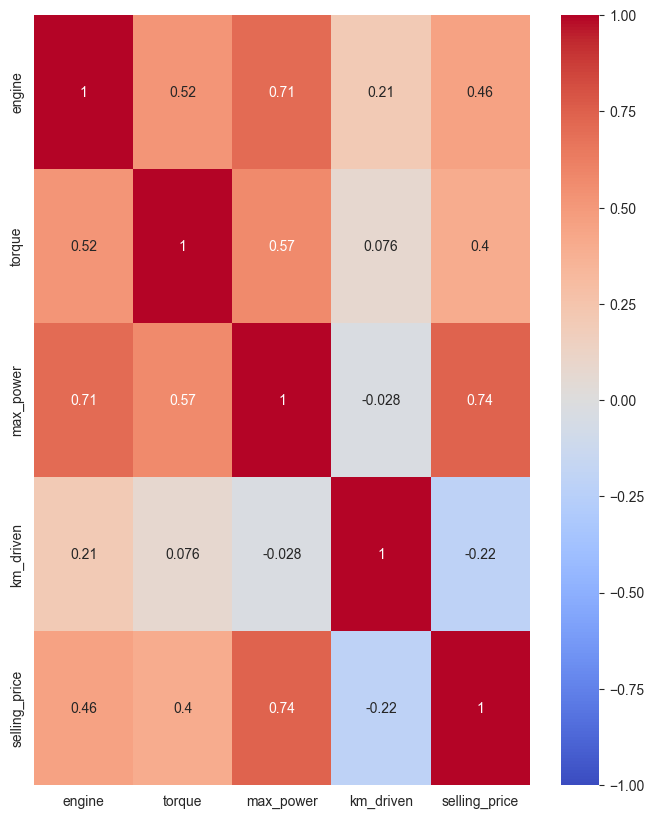

In [166]:
sns.heatmap(selected_data.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True)
plt.show()

# One hot encoding to encode categorical data

In [167]:
#One hot encoding
columns_to_encode = ['fuel', 'seller_type', 'transmission', 'owner'] #columns with categorical data
df = pd.get_dummies(df, columns=columns_to_encode, prefix="encoded")
print(df)

      year  selling_price  km_driven  mileage  engine  max_power  seats  \
0     2014         450000     145500    23.40  1248.0      74.00    5.0   
1     2014         370000     120000    21.14  1498.0     103.52    5.0   
2     2006         158000     140000    17.70  1497.0      78.00    5.0   
3     2010         225000     127000    23.00  1396.0      90.00    5.0   
4     2007         130000     120000    16.10  1298.0      88.20    5.0   
...    ...            ...        ...      ...     ...        ...    ...   
8123  2013         320000     110000    18.50  1197.0      82.85    5.0   
8124  2007         135000     119000    16.80  1493.0     110.00    5.0   
8125  2009         382000     120000    19.30  1248.0      73.90    5.0   
8126  2013         290000      25000    23.57  1396.0      70.00    5.0   
8127  2013         290000      25000    23.57  1396.0      70.00    5.0   

      torque     rpm  encoded_CNG  ...  encoded_Dealer  encoded_Individual  \
0     190.00  2000.0 

In [168]:
# Year is ordinal so label encoding
le = LabelEncoder()
df['encoded_year'] = le.fit_transform(df['year'])

# Feature Selection using Lasso CV

Best alpha using built-in LassoCV 9633973.750730
Best score using built-in LassoCV 0.349439
Lasso picked 4 variables and eliminated the other 19 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

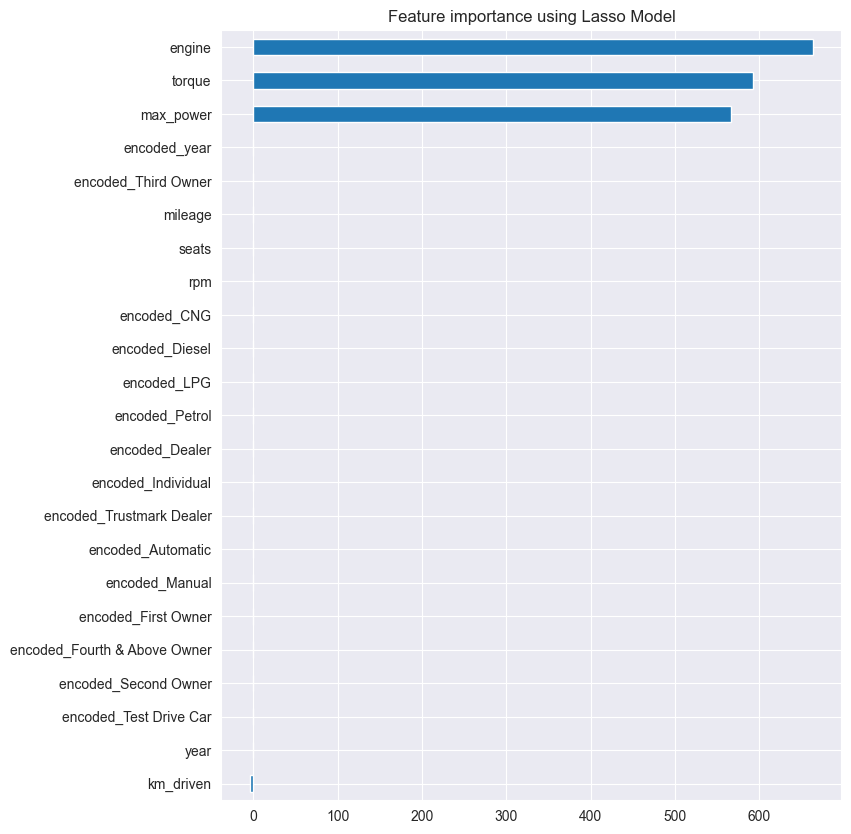

In [170]:
'Looking at feature importance'

y2 = df['selling_price']
X2 = df.drop(['selling_price'],axis=1)

from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X2,y2)
print("Best alpha using built-in LassoCV %F" %reg.alpha_)
print("Best score using built-in LassoCV %f" %reg.score(X2,y2))
coef = pd.Series(reg.coef_,index=X2.columns)
print("Lasso picked " + str(sum(coef!=0)) + " variables and eliminated the other " + str(sum(coef==0)) + " variables")
imp_coef =  coef.sort_values()

# Print out Lasso's results
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0,10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# Selecting features based on Lasso output

In [171]:
print(df.columns)
selected_data = df[['engine','torque','max_power','km_driven','selling_price']]
selected_data.describe()

Index(['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'seats', 'torque', 'rpm', 'encoded_CNG', 'encoded_Diesel',
       'encoded_LPG', 'encoded_Petrol', 'encoded_Dealer', 'encoded_Individual',
       'encoded_Trustmark Dealer', 'encoded_Automatic', 'encoded_Manual',
       'encoded_First Owner', 'encoded_Fourth & Above Owner',
       'encoded_Second Owner', 'encoded_Test Drive Car', 'encoded_Third Owner',
       'encoded_year'],
      dtype='object')


,engine,torque,max_power,km_driven,selling_price
count,7831.000000,7831.000000,7831.000000,7.831000e+03,7.831000e+03
mean,1456.959648,181.647304,91.201350,6.927051e+04,6.375025e+05
std,504.647194,137.961472,35.272426,5.684666e+04,7.882279e+05
min,624.000000,47.040000,32.800000,1.000000e+00,2.999900e+04
25%,1197.000000,111.800000,68.050000,3.500000e+04,2.700000e+05
50%,1248.000000,170.000000,82.000000,6.000000e+04,4.500000e+05
75%,1582.000000,205.000000,102.000000,9.600000e+04,6.800000e+05
max,3604.000000,4998.000000,400.000000,2.360457e+06,1.000000e+07


In [172]:
columns_list = list(selected_data.columns)
print(columns_list)
col_list = pd.DataFrame (selected_data, columns=columns_list[:8])

# Calculate the IQR for each column in the dataset
Q1 = col_list.quantile(0.25)
Q3 = col_list.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((col_list < (Q1 - 1.5 * IQR)) | (col_list > (Q3 + 1.5 * IQR)))

# Count the number of outliers for each variable
num_outliers = outliers.sum()

# Number of outliers for each variable
num_outliers.to_frame().T

['engine', 'torque', 'max_power', 'km_driven', 'selling_price']


,engine,torque,max_power,km_driven,selling_price
0,1182,466,528,189,581


In [173]:
data = selected_data['selling_price']
price_list = selected_data['selling_price'].tolist() 

def detect_outlier(data):
    outlier = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score)>threshold:
            outlier.append(i)
    return outlier

outlier_pt = detect_outlier(price_list)
outlier_pt = sorted(outlier_pt)
print(outlier_pt)
print("Total num:",len(outlier_pt))

[3100000, 3100000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3250000, 3250000, 3250000, 3251000, 3300000, 3350000, 3350000, 3500000, 3500000, 3600000, 3750000, 3750000, 3790000, 3790000, 3900000, 3975000, 3975000, 3975000, 3975000, 3975000, 3975000, 4000000, 4000000, 4090000, 4100000, 4100000, 4100000, 4100000, 4100000, 4100000, 4500000, 4500000, 4500000, 4500000, 4600000, 4600000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 

### More outlier analysis shown below under random forest model

# Exploratory data analysis

# Training the data & Fitting the data to a model

In [174]:
X = selected_data.drop("selling_price",axis=1)
y = selected_data["selling_price"]

In [175]:
random_states = []
train_r2_scores = []
test_r2_scores = []
r2_scores = []

# Iterate over random states from 0 to 100
for random_state in range(101):
    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=random_state)

    # Standardize data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Creating and training Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Making predictions on both the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate R-squared for training and testing sets and store the results
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Calculate R2 score
    r2 = model.score(X_test, y_test)
    r2_scores.append(r2)
    
    # Store random state and corresponding R-squared values
    random_states.append(random_state)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

# Displaying model parameters
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)


Intercept: 
 636057.832329867
Coefficients: 
 [ -39905.6369914    -3287.42796967  607535.59864493 -131481.01208003]


# Evaluating the Model & Root Mean Square Error

In [176]:
results = list(zip(random_states, train_r2_scores, test_r2_scores))
print('\nRandom State, Train R-squared, and Test R-squared Values:')
for result in results:
    print(f'Random State: {result[0]}, Train R-squared: {result[1]:.4f}, Test R-squared: {result[2]:.4f}')


Random State, Train R-squared, and Test R-squared Values:
Random State: 0, Train R-squared: 0.5716, Test R-squared: 0.6127
Random State: 1, Train R-squared: 0.5878, Test R-squared: 0.5761
Random State: 2, Train R-squared: 0.5940, Test R-squared: 0.5536
Random State: 3, Train R-squared: 0.5920, Test R-squared: 0.5634
Random State: 4, Train R-squared: 0.6003, Test R-squared: 0.5496
Random State: 5, Train R-squared: 0.6069, Test R-squared: 0.5339
Random State: 6, Train R-squared: 0.6007, Test R-squared: 0.5444
Random State: 7, Train R-squared: 0.5699, Test R-squared: 0.6149
Random State: 8, Train R-squared: 0.5709, Test R-squared: 0.6132
Random State: 9, Train R-squared: 0.5937, Test R-squared: 0.5635
Random State: 10, Train R-squared: 0.5966, Test R-squared: 0.5567
Random State: 11, Train R-squared: 0.5704, Test R-squared: 0.6121
Random State: 12, Train R-squared: 0.5901, Test R-squared: 0.5759
Random State: 13, Train R-squared: 0.5932, Test R-squared: 0.5524
Random State: 14, Train R-s

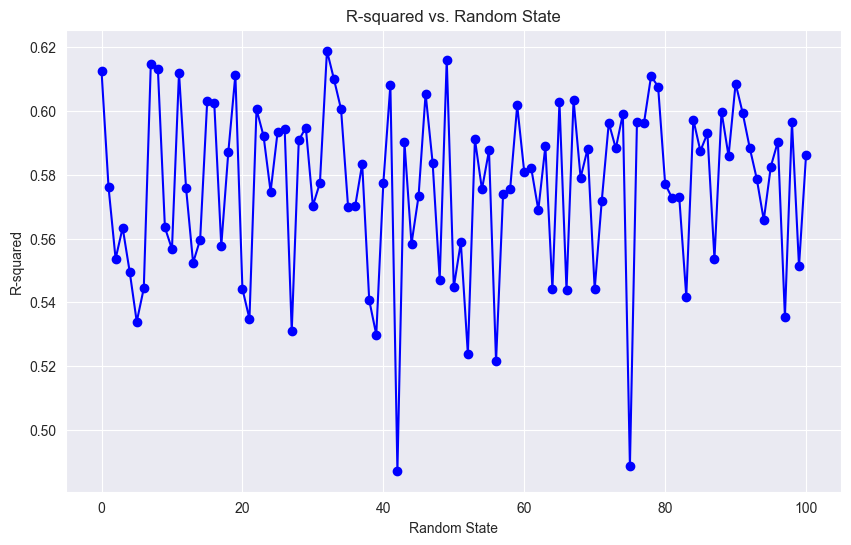

Max r2 value:0.62
Min r2 value:0.49


In [177]:
# Plotting the R-squared values
plt.figure(figsize=(10, 6))
plt.plot(range(101), r2_scores, marker='o', linestyle='-', color='b')
plt.title('R-squared vs. Random State')
plt.xlabel('Random State')
plt.ylabel('R-squared')
plt.grid(True)
plt.show()

print("Max r2 value:%.2f" %max(r2_scores))
print("Min r2 value:%.2f" %min(r2_scores))

# As Linear Regression Model provides unsatisfactory result, I will use Random Forest Model

### Data preperation

In [104]:
RFdf = pd.read_csv('resale_car_price.csv')
RFdf = RFdf.dropna()
print(RFdf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7864 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7864 non-null   object 
 1   year           7864 non-null   int64  
 2   selling_price  7864 non-null   int64  
 3   km_driven      7864 non-null   int64  
 4   fuel           7864 non-null   object 
 5   seller_type    7864 non-null   object 
 6   transmission   7864 non-null   object 
 7   owner          7864 non-null   object 
 8   mileage        7864 non-null   float64
 9   engine         7864 non-null   float64
 10  max_power      7864 non-null   float64
 11  seats          7864 non-null   float64
 12  torque         7864 non-null   object 
 13  rpm            7864 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 921.6+ KB
None


In [105]:
print(RFdf.describe().T)

                count           mean            std      min        25%  \
year           7864.0    2013.969100       3.854031   1994.0    2012.00   
selling_price  7864.0  636117.405519  786891.162404  29999.0  269500.00   
km_driven      7864.0   69321.433876   56781.141568      1.0   35000.00   
mileage        7864.0      19.429975       4.038918      0.0      16.78   
engine         7864.0    1456.021745     503.879993    624.0    1197.00   
max_power      7864.0      91.175963      35.222219     32.8      68.05   
seats          7864.0       5.418616       0.961282      2.0       5.00   

                     50%        75%         max  
year             2015.00    2017.00      2020.0  
selling_price  450000.00  680000.00  10000000.0  
km_driven       60000.00   96000.00   2360457.0  
mileage            19.33      22.32        42.0  
engine           1248.00    1582.00      3604.0  
max_power          82.00     102.00       400.0  
seats               5.00       5.00        14.0  

In [106]:
print(RFdf.shape)
RFdf.head()

(7864, 14)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque,rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250,2500
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,124.46,2700
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,219.52,2750
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,112.7,4500


In [107]:
RFdf.duplicated().sum()
print('------------------')
RFdf.isnull().sum()

------------------


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
torque           0
rpm              0
dtype: int64

### Non-numeric data

In [108]:
print(RFdf['fuel'].unique())
print(RFdf['seller_type'].unique())
print(RFdf['transmission'].unique())
print(RFdf['owner'].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


<AxesSubplot:>

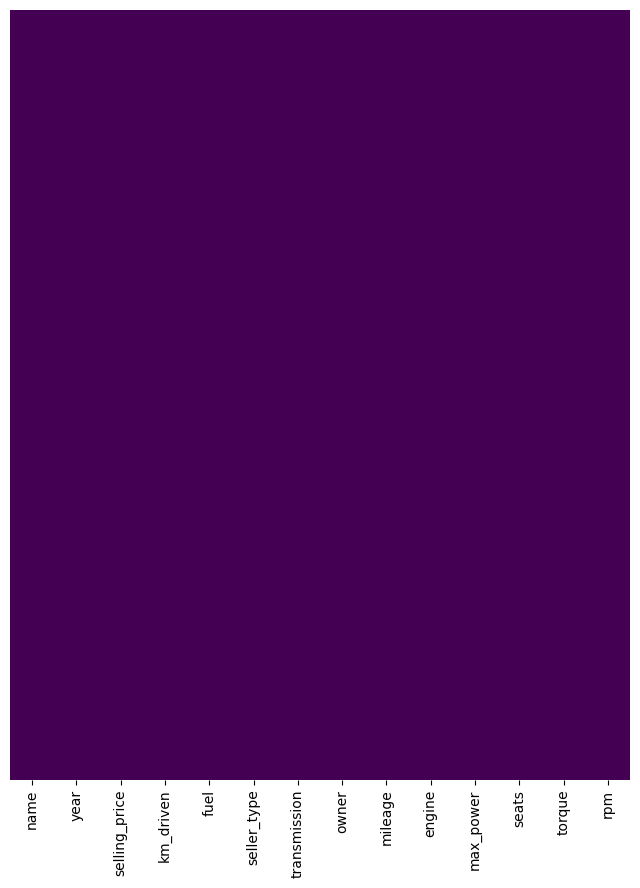

In [109]:
import seaborn as sns
sns.heatmap(RFdf.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

In [110]:
RFdf.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'torque', 'rpm'],
      dtype='object')

In [111]:
final_data = RFdf.drop('name',axis=1) #drop name as before

In [112]:
final_data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque,rpm
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190,2000
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250,2500
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,124.46,2700
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,219.52,2750
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,112.7,4500


In [113]:
print(final_data.dtypes)

year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
torque            object
rpm               object
dtype: object


In [114]:
final_data['torque'] = pd.to_numeric(final_data['torque'], errors='coerce') #convert 'torque' and 'rpm' columns to proper data type
final_data['rpm'] = pd.to_numeric(final_data['rpm'], errors='coerce')

# Print the data types of the columns after conversion
print(final_data.dtypes)

year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
torque           float64
rpm              float64
dtype: object


In [115]:
print(final_data[['torque', 'rpm']].isnull().sum())

torque     1
rpm       32
dtype: int64


In [116]:
final_data = final_data.dropna(subset=['torque', 'rpm'])
print(final_data[['torque', 'rpm']].isnull().sum())

torque    0
rpm       0
dtype: int64


In [117]:
print(final_data.isnull().sum())

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
torque           0
rpm              0
dtype: int64


<AxesSubplot:>

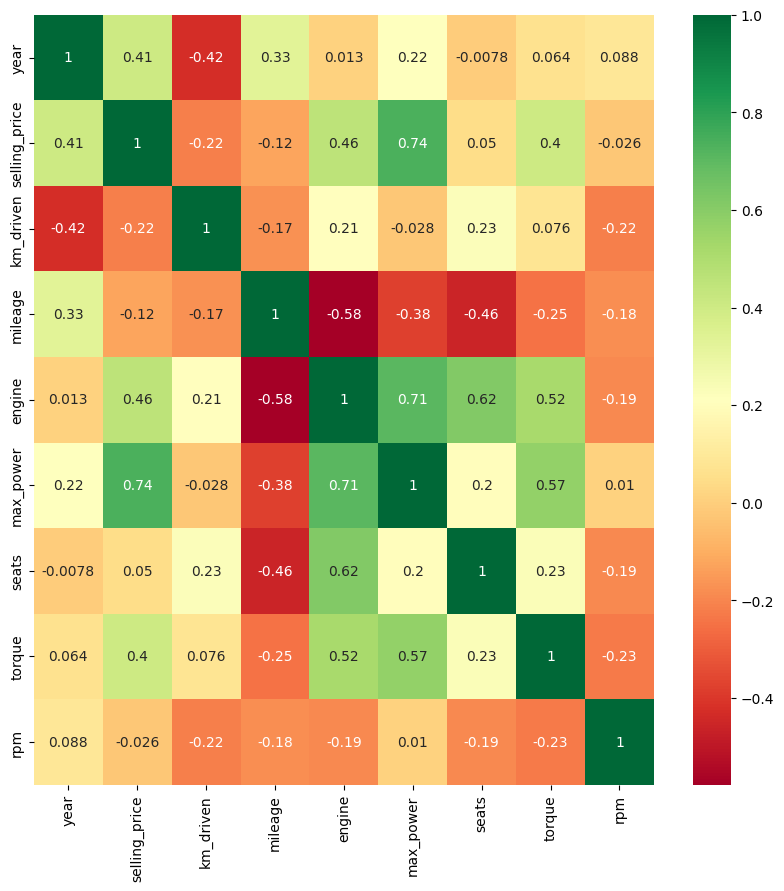

In [118]:
from matplotlib import pyplot as plt
%matplotlib inline

corrmat = final_data.corr()
plt.figure(figsize=(10,10))
#plot heat map
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")

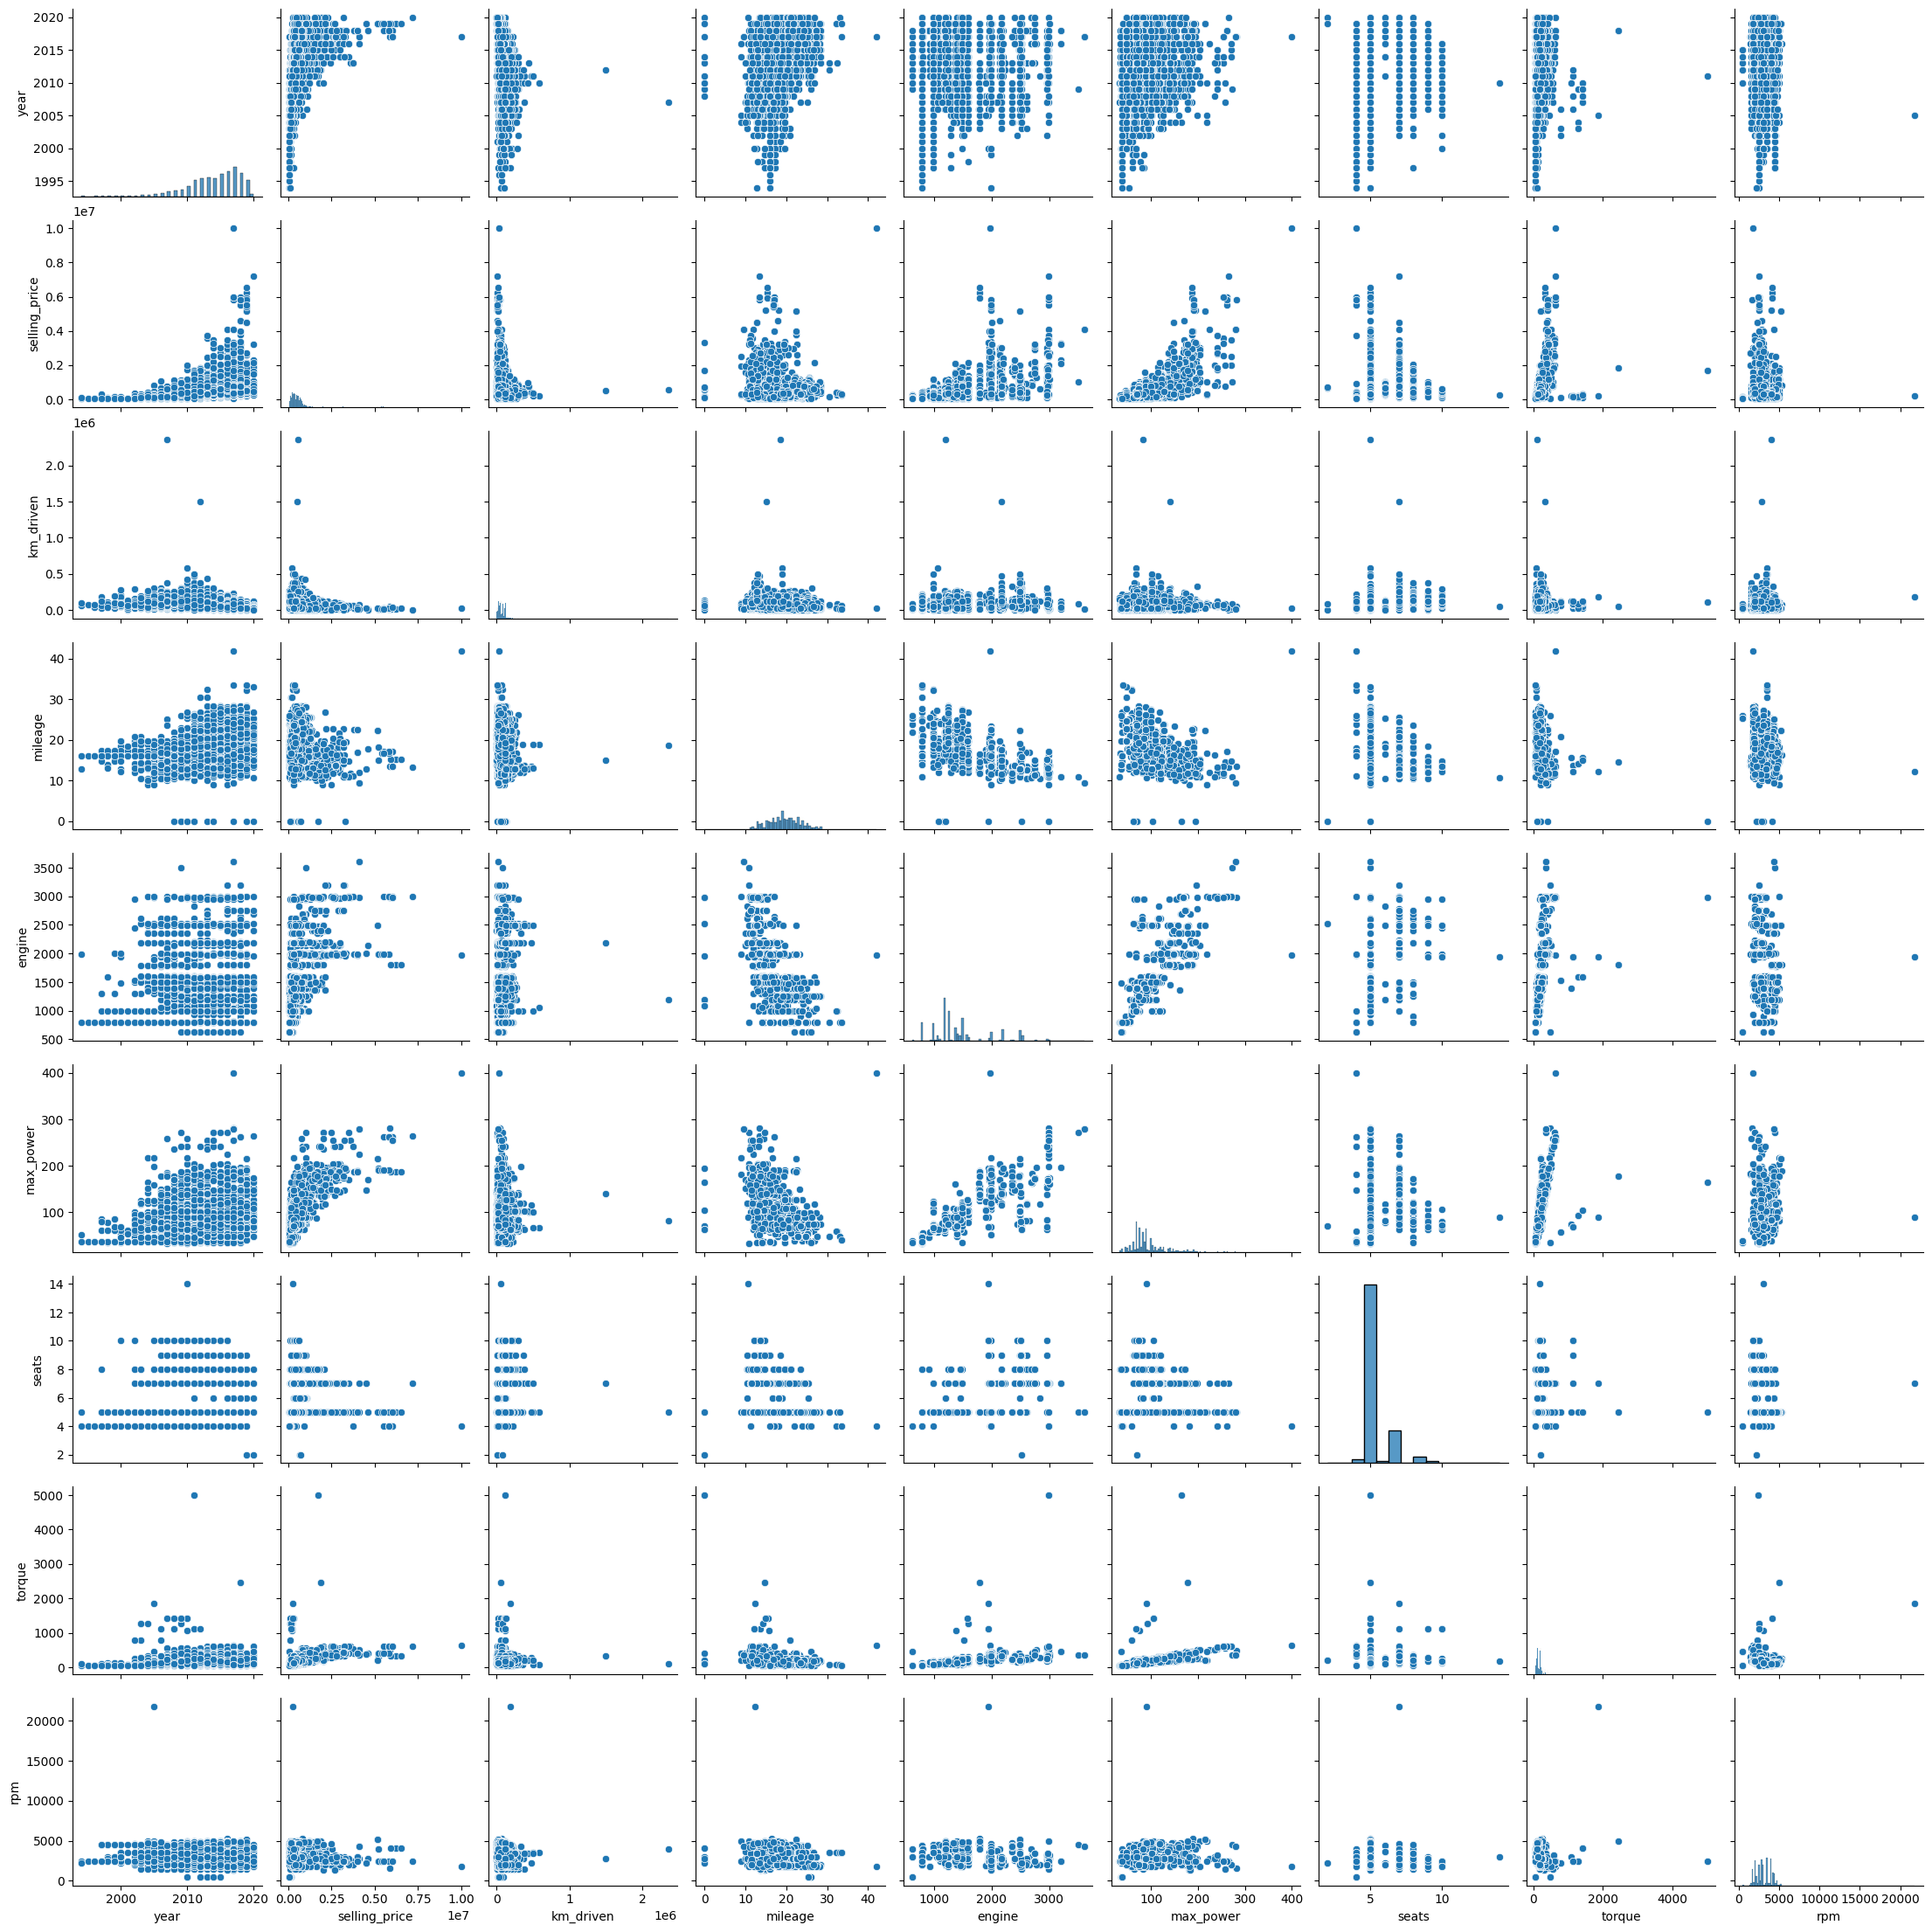

In [119]:
sns.pairplot(final_data)

# No null values. Encoding time.

In [120]:
Dummies = pd.get_dummies(final_data[['fuel', 'seller_type', 'transmission','owner']], drop_first = True)
final_data = final_data.drop(['fuel', 'seller_type', 'transmission','owner'], axis = 1)
final_data = pd.concat([final_data, Dummies], axis = 1)

In [121]:
final_data.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats,torque,rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,23.40,1248.0,74.00,5.0,190.00,2000.0,1,0,0,1,0,1,0,0,0,0
1,2014,370000,120000,21.14,1498.0,103.52,5.0,250.00,2500.0,1,0,0,1,0,1,0,1,0,0
2,2006,158000,140000,17.70,1497.0,78.00,5.0,124.46,2700.0,0,0,1,1,0,1,0,0,0,1
3,2010,225000,127000,23.00,1396.0,90.00,5.0,219.52,2750.0,1,0,0,1,0,1,0,0,0,0
4,2007,130000,120000,16.10,1298.0,88.20,5.0,112.70,4500.0,0,0,1,1,0,1,0,0,0,0


In [122]:
final_data.iloc[42] #<--- This shows that transmission manual and automatic does exist and that data has been enocded properly.

year                              2018.00
selling_price                   675000.00
km_driven                        23300.00
mileage                             18.50
engine                            1197.00
max_power                           83.14
seats                                5.00
torque                             115.00
rpm                               4000.00
fuel_Diesel                          0.00
fuel_LPG                             0.00
fuel_Petrol                          1.00
seller_type_Individual               0.00
seller_type_Trustmark Dealer         0.00
transmission_Manual                  0.00
owner_Fourth & Above Owner           0.00
owner_Second Owner                   0.00
owner_Test Drive Car                 0.00
owner_Third Owner                    0.00
Name: 44, dtype: float64

# Categorical data encoded - View data next

In [123]:
final_data.corr()

,year,selling_price,km_driven,mileage,engine,max_power,seats,torque,rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
year,1.000000,0.405359,-0.424627,0.331728,0.012885,0.215018,-0.007765,0.064270,0.088129,0.030765,-0.060266,-0.027538,-0.245758,0.101179,-0.238274,-0.205800,-0.316206,0.032899,-0.271289
selling_price,0.405359,1.000000,-0.215033,-0.123860,0.455405,0.740010,0.050019,0.402908,-0.026341,0.195451,-0.036267,-0.185598,-0.406337,0.036754,-0.573970,-0.073088,-0.175078,0.120783,-0.114482
km_driven,-0.424627,-0.215033,1.000000,-0.174667,0.210285,-0.027855,0.227704,0.075958,-0.217917,0.277132,0.023087,-0.279933,0.203686,-0.083764,0.194561,0.087383,0.207746,-0.024296,0.148077
mileage,0.331728,-0.123860,-0.174667,1.000000,-0.577813,-0.376933,-0.455375,-0.248903,-0.179200,0.060656,-0.014274,-0.075333,0.011492,-0.037174,0.176994,-0.071702,-0.103641,-0.015804,-0.098446
engine,0.012885,0.455405,0.210285,-0.577813,1.000000,0.706207,0.615173,0.517050,-0.194259,0.504510,-0.056635,-0.488257,-0.134159,0.039433,-0.276167,-0.004145,0.022835,0.014087,-0.002979
max_power,0.215018,0.740010,-0.027855,-0.376933,0.706207,1.000000,0.200468,0.570894,0.010416,0.300268,-0.060544,-0.281362,-0.295919,0.028912,-0.527527,-0.035682,-0.079788,0.050921,-0.051462
seats,-0.007765,0.050019,0.227704,-0.455375,0.615173,0.200468,1.000000,0.230262,-0.192525,0.356907,-0.029253,-0.347402,0.082370,-0.028865,0.069720,0.008942,0.032993,-0.011036,0.005474
torque,0.064270,0.402908,0.075958,-0.248903,0.517050,0.570894,0.230262,1.000000,-0.229777,0.441258,-0.047259,-0.426407,-0.121251,-0.054014,-0.258905,-0.009151,-0.034617,0.017434,0.027565
rpm,0.088129,-0.026341,-0.217917,-0.179200,-0.194259,0.010416,-0.192525,-0.229777,1.000000,-0.751809,0.043774,0.744299,-0.086005,0.184792,-0.144449,-0.022847,-0.082658,0.022929,-0.031047
fuel_Diesel,0.030765,0.195451,0.277132,0.060656,0.504510,0.300268,0.356907,0.441258,-0.751809,1.000000,-0.073126,-0.977813,0.002904,-0.141397,0.038210,-0.005143,0.053821,-0.017437,-0.005202


### Checking for outliers

In [124]:
columns_list = list(final_data.columns)
print(columns_list)
col_list = pd.DataFrame (final_data, columns=columns_list[:8])

['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque', 'rpm', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'transmission_Manual', 'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner']


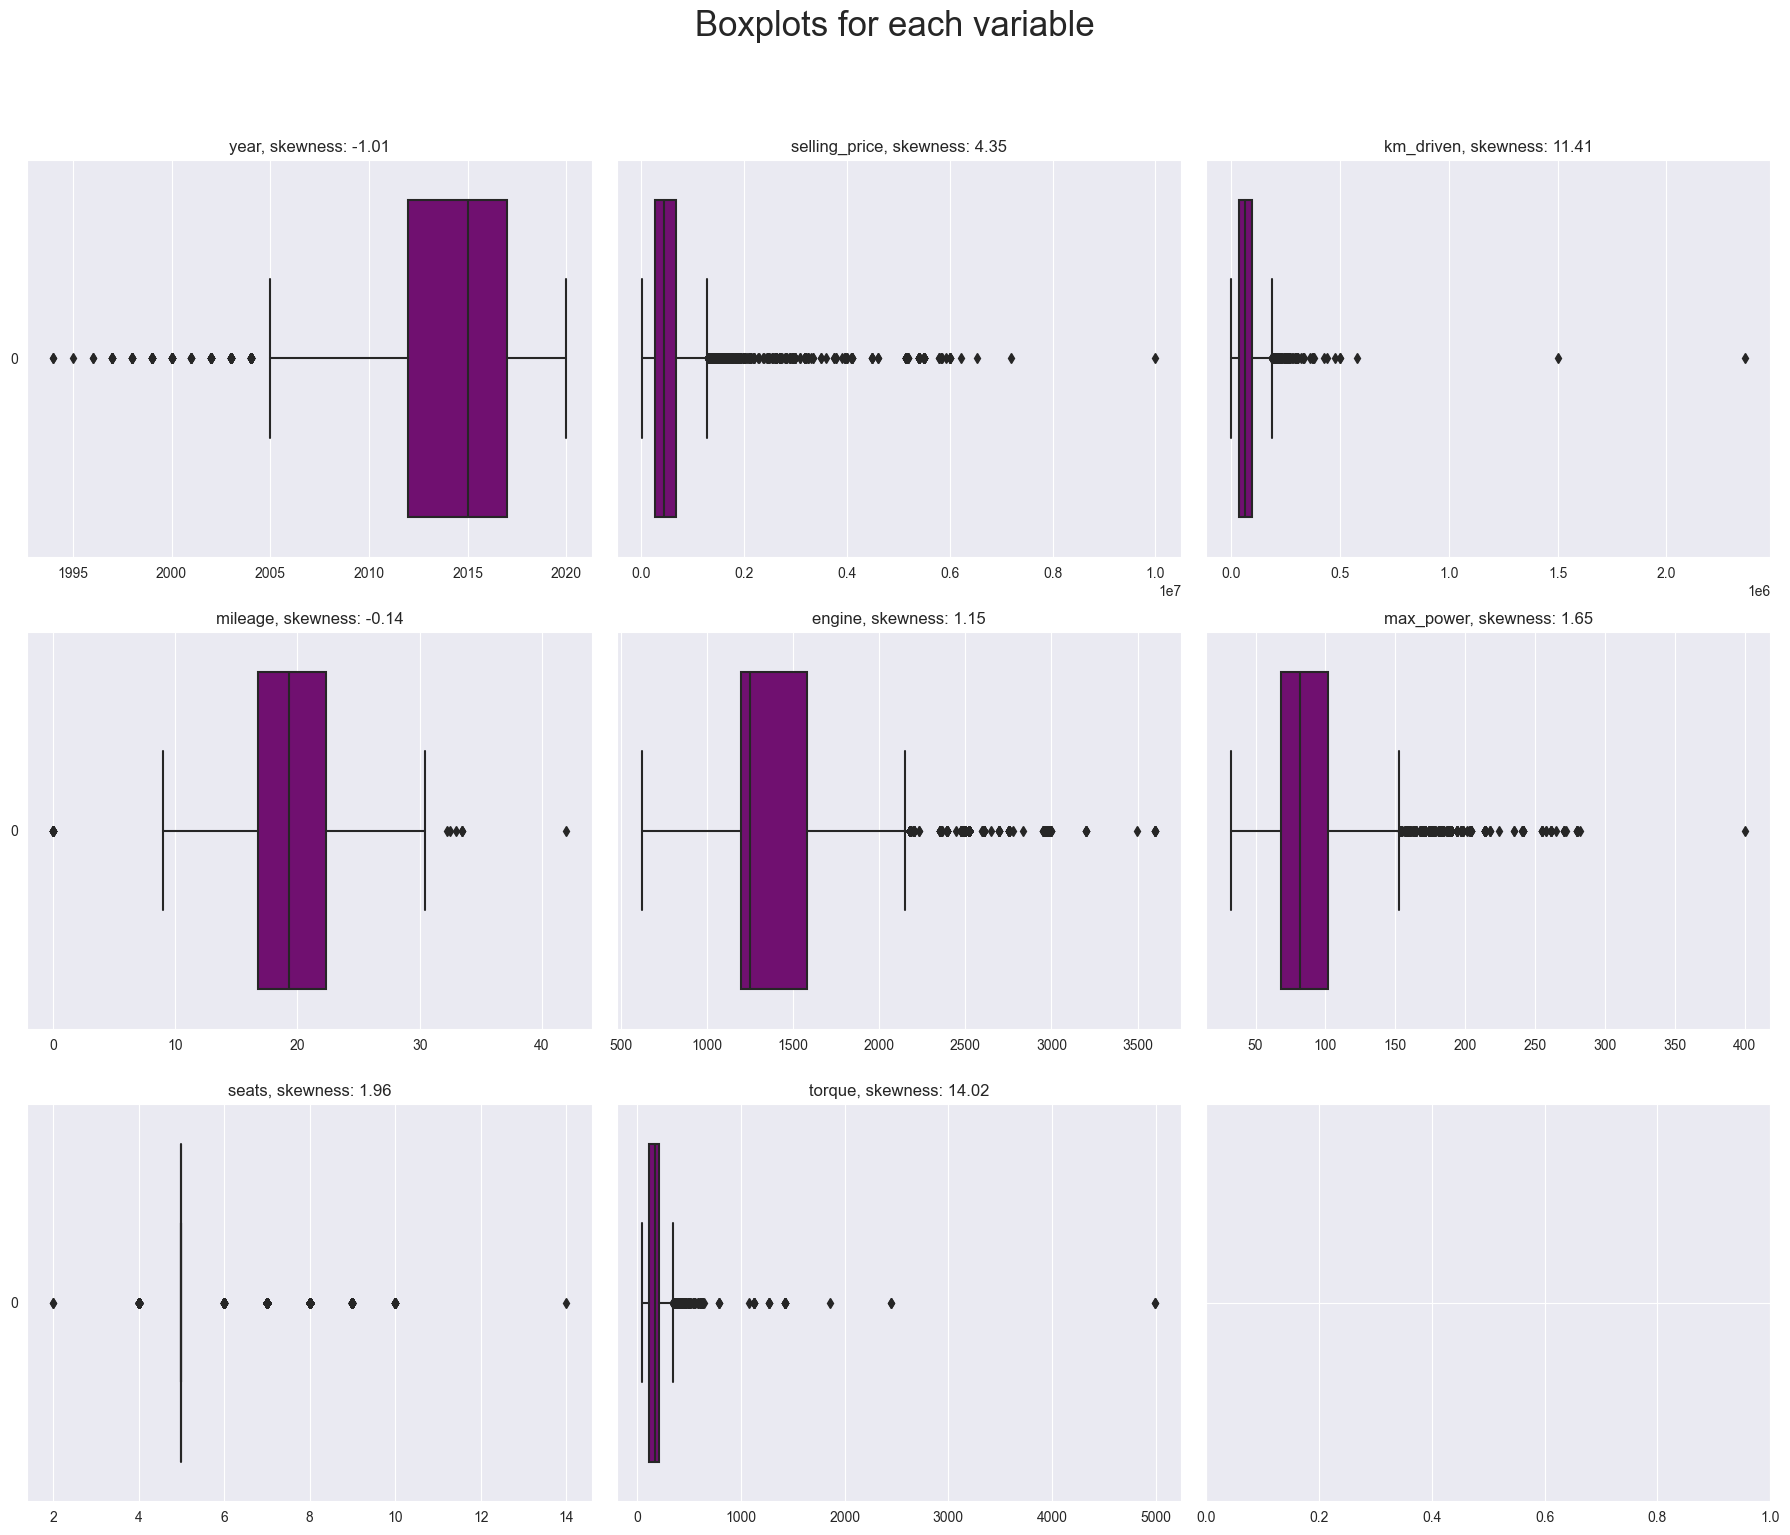

In [125]:
sns.set_style('darkgrid')

def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(18, 15))  # Increase figsize
    fig.suptitle(suptitle, y=1.02, size=25)  # Adjust y and size for title
    axs = axs.flatten()
    
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', color='purple', ax=axs[i])
        axs[i].set_title(data + ', skewness: ' + str(round(dataset[data].skew(axis=0, skipna=True), 2)), fontsize=12)  # Adjust fontsize

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)  # Adjust top to make space for title
    
boxplots_custom(dataset=df, columns_list=col_list, rows=3, cols=3, suptitle='Boxplots for each variable')
plt.show()

In [126]:
# Calculate the IQR for each column in the dataset
Q1 = col_list.quantile(0.25)
Q3 = col_list.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((col_list < (Q1 - 1.5 * IQR)) | (col_list > (Q3 + 1.5 * IQR)))

# Count the number of outliers for each variable
num_outliers = outliers.sum()

# Number of outliers for each variable
num_outliers.to_frame().T

,year,selling_price,km_driven,mileage,engine,max_power,seats,torque
0,164,581,189,23,1182,528,1652,466


In [127]:
data = final_data['selling_price']

# Calculate the first quartile (Q1), third quartile (Q3), and IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

# Print the outlier values
outlier_values = data[outliers].tolist()
outlier_values = sorted(outlier_values)
print(outlier_values)
print(f"Min: {outlier_values[0]}\nMax: {outlier_values[-1]}")
print("Total num:",len(outlier_values))

[1300000, 1300000, 1300000, 1300000, 1300000, 1300000, 1300000, 1300000, 1300000, 1300000, 1300000, 1300000, 1300000, 1300000, 1300000, 1300000, 1300000, 1300000, 1325000, 1325000, 1325000, 1325000, 1350000, 1350000, 1350000, 1350000, 1350000, 1350000, 1350000, 1350000, 1350000, 1350000, 1350000, 1350000, 1350000, 1350000, 1365000, 1380000, 1380000, 1380000, 1380000, 1380000, 1385000, 1390000, 1400000, 1400000, 1400000, 1400000, 1400000, 1400000, 1400000, 1400000, 1400000, 1405000, 1405000, 1425000, 1445000, 1450000, 1450000, 1450000, 1450000, 1450000, 1450000, 1450000, 1450000, 1460000, 1460000, 1460000, 1465000, 1465000, 1475000, 1475000, 1490000, 1500000, 1500000, 1500000, 1500000, 1500000, 1500000, 1500000, 1500000, 1500000, 1500000, 1500000, 1500000, 1500000, 1500000, 1500000, 1500000, 1511000, 1515000, 1516000, 1520000, 1525000, 1525000, 1525000, 1525000, 1525000, 1530000, 1550000, 1550000, 1550000, 1550000, 1550000, 1550000, 1560000, 1575000, 1575000, 1575000, 1575000, 1575000, 

In [128]:
data = final_data['selling_price']
price_list = final_data['selling_price'].tolist() 

def detect_outlier(data):
    outlier = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score)>threshold:
            outlier.append(i)
    return outlier

outlier_pt = detect_outlier(price_list)
outlier_pt = sorted(outlier_pt)
print(outlier_pt)
print("Total num:",len(outlier_pt))

[3100000, 3100000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3200000, 3250000, 3250000, 3250000, 3251000, 3300000, 3350000, 3350000, 3500000, 3500000, 3600000, 3750000, 3750000, 3790000, 3790000, 3900000, 3975000, 3975000, 3975000, 3975000, 3975000, 3975000, 4000000, 4000000, 4090000, 4100000, 4100000, 4100000, 4100000, 4100000, 4100000, 4500000, 4500000, 4500000, 4500000, 4600000, 4600000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 5150000, 

In [129]:
data = final_data['engine']
tst_list = final_data['engine'].tolist() 

def detect_outlier(data):
    outlier = []
    threshold = 3 #extreme outliers
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score)>threshold:
            outlier.append(i)
    return outlier

outlier_pt = detect_outlier(tst_list)
outlier_pt = sorted(outlier_pt)
print(outlier_pt)
print("Total num:",len(outlier_pt))

[2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2982.0, 2987.0, 2987.0, 2987.0, 2987.0, 2987.0, 2987.0, 2987.0, 2987.0, 2987.0, 2987.0, 2987.0, 2993.0, 2993.0, 2993.0, 2993.0, 2993.0, 2993.0, 2993.0, 2993.0, 2993.0, 2993.0, 2993.0, 2993.0, 2993.0, 2993.0, 2993.0, 2993.0, 2993.0, 2997.0, 2997.0, 2999.0, 2999.0, 2999.0, 3198.0, 3198.0, 3198.0, 3198.0, 3198.0, 3498.0, 3604.0, 3604.0, 3604.0, 3604.0, 3604.0, 3604.0]
Total num: 78


In [130]:
data = final_data['max_power']
tst_list = final_data['max_power'].tolist() 

def detect_outlier(data):
    outlier = []
    threshold = 3 #extreme outliers
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score)>threshold:
            outlier.append(i)
    return outlier

outlier_pt = detect_outlier(tst_list)
outlier_pt = sorted(outlier_pt)
print(outlier_pt)
print("Total num:",len(outlier_pt))

[197.2, 198.25, 198.25, 198.25, 198.5, 201.1, 203.0, 203.2, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 214.56, 218.0, 218.0, 218.0, 224.0, 235.0, 235.0, 241.0, 241.0, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 254.79, 254.79, 254.79, 254.8, 254.8, 254.8, 258.0, 258.0, 261.4, 261.4, 261.4, 261.4, 261.4, 261.4, 265.0, 270.9, 270.9, 270.9, 270.9, 272.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 282.0, 400.0]
Total num: 94


In [131]:
data = final_data['seats']
tst_list = final_data['seats'].tolist() 

def detect_outlier(data):
    outlier = []
    threshold = 3 #extreme outliers
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score)>threshold:
            outlier.append(i)
    return outlier

outlier_pt = detect_outlier(tst_list)
outlier_pt = sorted(outlier_pt)
print(outlier_pt)
print("Total num:",len(outlier_pt))

[2.0, 2.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 14.0]
Total num: 102


In [132]:
print(len(final_data))

7831


# Decided not to remove outliers

In [133]:
print(final_data.shape)
final_data.head()

(7831, 19)


,year,selling_price,km_driven,mileage,engine,max_power,seats,torque,rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,23.40,1248.0,74.00,5.0,190.00,2000.0,1,0,0,1,0,1,0,0,0,0
1,2014,370000,120000,21.14,1498.0,103.52,5.0,250.00,2500.0,1,0,0,1,0,1,0,1,0,0
2,2006,158000,140000,17.70,1497.0,78.00,5.0,124.46,2700.0,0,0,1,1,0,1,0,0,0,1
3,2010,225000,127000,23.00,1396.0,90.00,5.0,219.52,2750.0,1,0,0,1,0,1,0,0,0,0
4,2007,130000,120000,16.10,1298.0,88.20,5.0,112.70,4500.0,0,0,1,1,0,1,0,0,0,0


# Data is ready

In [134]:
X = final_data.drop(['selling_price'], axis = 1)
y = final_data['selling_price']

In [135]:
X.head()

,year,km_driven,mileage,engine,max_power,seats,torque,rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,145500,23.40,1248.0,74.00,5.0,190.00,2000.0,1,0,0,1,0,1,0,0,0,0
1,2014,120000,21.14,1498.0,103.52,5.0,250.00,2500.0,1,0,0,1,0,1,0,1,0,0
2,2006,140000,17.70,1497.0,78.00,5.0,124.46,2700.0,0,0,1,1,0,1,0,0,0,1
3,2010,127000,23.00,1396.0,90.00,5.0,219.52,2750.0,1,0,0,1,0,1,0,0,0,0
4,2007,120000,16.10,1298.0,88.20,5.0,112.70,4500.0,0,0,1,1,0,1,0,0,0,0


In [136]:
y.head()

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

# Identify feature importance

In [137]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y) #fit to model

print(model.feature_importances_)

[1.58990963e-01 4.02507595e-02 1.82870025e-02 7.85298232e-02
 2.76668874e-01 9.62356612e-03 4.32501402e-02 1.81259212e-02
 1.16912303e-02 5.95440438e-06 8.77129720e-03 4.78362394e-02
 9.99726444e-04 2.78687303e-01 2.53629721e-04 3.49454705e-03
 3.75517225e-03 7.77851218e-04]


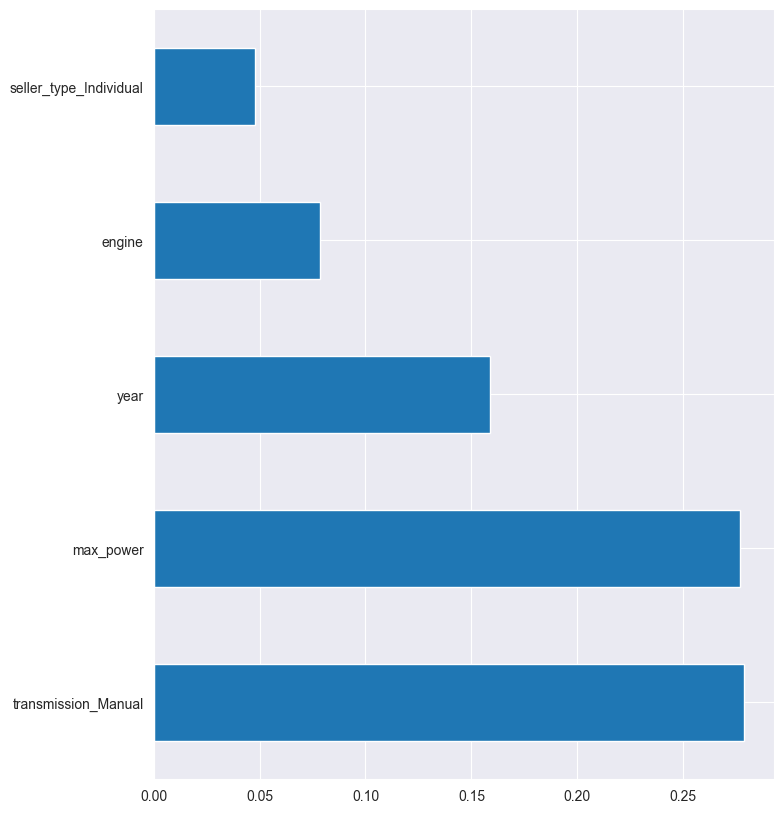

In [138]:
#feature importance graph
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# Random forest regression

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) #0.7 train size

### Base estimator for RandomizedSearchCV

In [140]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
rf = RandomForestRegressor() 
rf.fit(X_train_scaled, y_train) #fit trained data

RandomForestRegressor()

In [141]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators) #Experiment with different number of trees

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


### Build RandomForestModel with hyperparameters

In [142]:
from sklearn.model_selection import RandomizedSearchCV # <--hyperparameter optimization

#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
# Minimum number of samples
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at leaf node 
min_samples_leaf = [1, 2, 5, 10]

In [143]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [144]:
model_rf = RandomForestRegressor() #base estimator in RandomizedSearchCV

In [145]:
rf_random = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   1.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   1.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [146]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [147]:
rf_random.best_score_

-17602724214.119167

In [148]:
# Assuming you have already fitted the model using RandomizedSearchCV and have the best model
best_rf_model = rf_random.best_estimator_

# Make predictions on the training set and testing set
y_train_pred = best_rf_model.predict(X_train_scaled)
y_test_pred = best_rf_model.predict(X_test_scaled)

# Calculate R-squared for training set and testing set
r2_train_value = r2_score(y_train, y_train_pred)
r2_test_value = r2_score(y_test, y_test_pred)

# Display the R-squared values with two decimal places
print('R-squared Coefficient of determination for training set: {:.5f}'.format(r2_train_value))
print('R-squared Coefficient of determination for testing set: {:.5f}'.format(r2_test_value))

R-squared Coefficient of determination for training set: 0.99558
R-squared Coefficient of determination for testing set: 0.94822


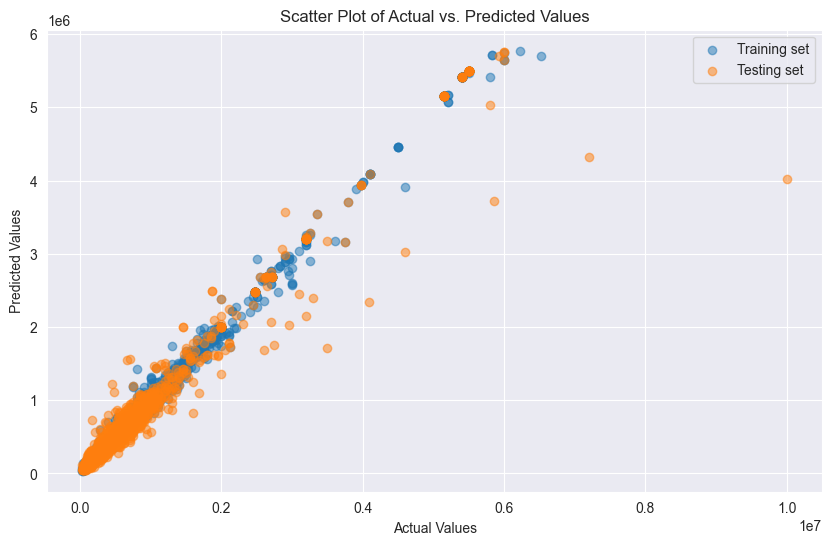

In [149]:
plt.figure(figsize=(10, 6))

plt.scatter(y_train, y_train_pred, label='Training set', alpha=0.5)
plt.scatter(y_test, y_test_pred, label='Testing set', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.legend()
plt.show()

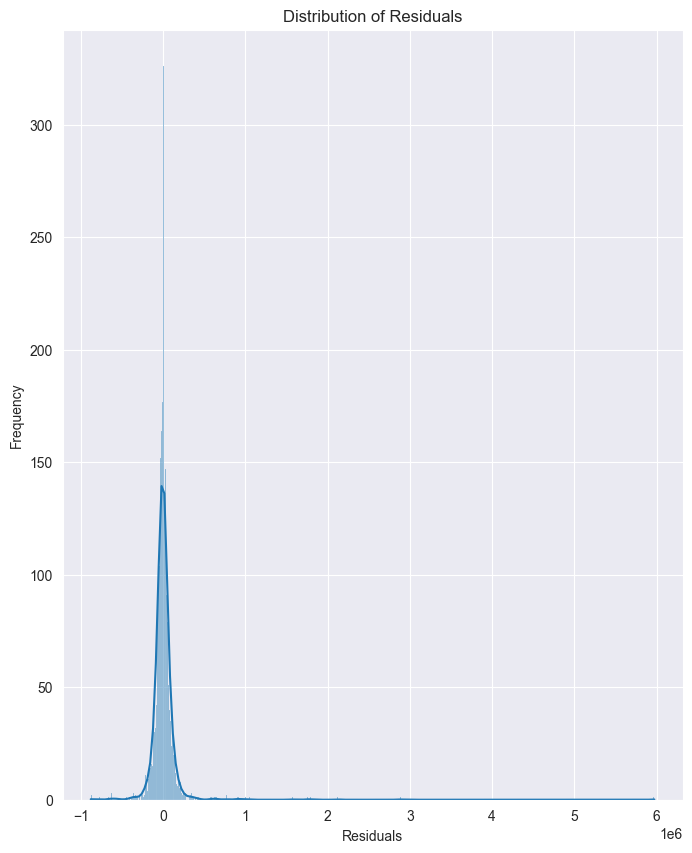

In [150]:
predictions = rf_random.predict(X_test_scaled)

# Histogram 
sns.histplot(y_test - predictions, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [151]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions)) #Average error
print('MSE:', metrics.mean_squared_error(y_test, predictions)) #Average of the absolute differences
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 67552.84811877845
MSE: 36259280355.655464
RMSE: 190418.69749490323


### Accuracy

In [152]:
metrics.r2_score(y_test, predictions)

0.9482193587538782

# Rerun code but using only selected features from seen feature importance

In [153]:
X2 = final_data[["engine","torque","year","transmission_Manual","max_power"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3, random_state = 0) #0.7 train size

from sklearn.ensemble import RandomForestRegressor
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
rf = RandomForestRegressor() 
rf.fit(X_train_scaled, y_train) #fit trained data

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators) #Experiment with different number of trees

from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
# Minimum number of samples
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at leaf node 
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

model_rf = RandomForestRegressor() #base estimator in RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train_scaled,y_train)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=40, max_f

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [154]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) #Average absolute differences
print('MSE:', metrics.mean_squared_error(y_test, predictions)) #Average of the squared differences
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# Assuming you have already fitted the model using RandomizedSearchCV and have the best model
best_rf_model = rf_random.best_estimator_

# Make predictions on the training set and testing set
y_train_pred = best_rf_model.predict(X_train_scaled)
y_test_pred = best_rf_model.predict(X_test_scaled)

# Calculate R-squared for training set and testing set
r2_train_value = r2_score(y_train, y_train_pred)
r2_test_value = r2_score(y_test, y_test_pred)

# Display the R-squared values with two decimal places
print('R-squared Coefficient of determination for training set: {:.5f}'.format(r2_train_value))
print('R-squared Coefficient of determination for testing set: {:.5f}'.format(r2_test_value))

metrics.r2_score(y_test, predictions)

MAE: 67552.84811877845
MSE: 36259280355.655464
RMSE: 190418.69749490323
R-squared Coefficient of determination for training set: 0.98889
R-squared Coefficient of determination for testing set: 0.95153


0.9482193587538782

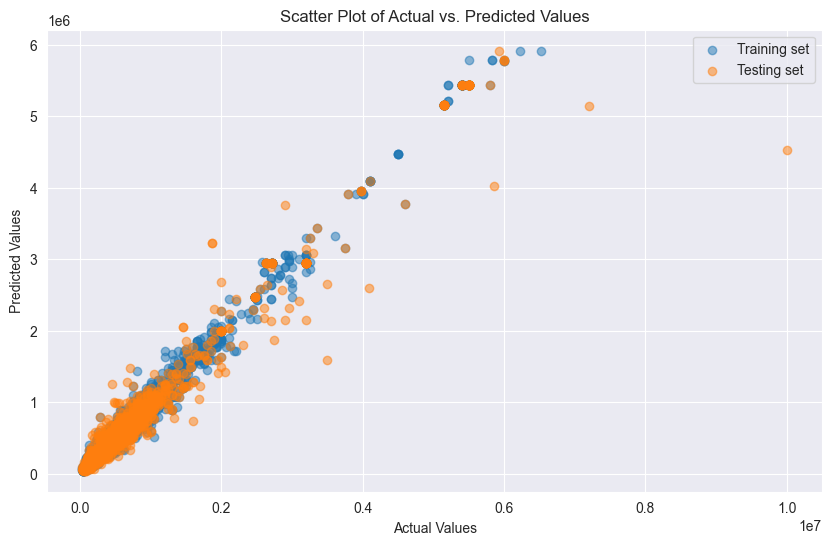

In [155]:
plt.figure(figsize=(10, 6))

plt.scatter(y_train, y_train_pred, label='Training set', alpha=0.5)
plt.scatter(y_test, y_test_pred, label='Testing set', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.legend()
plt.show()

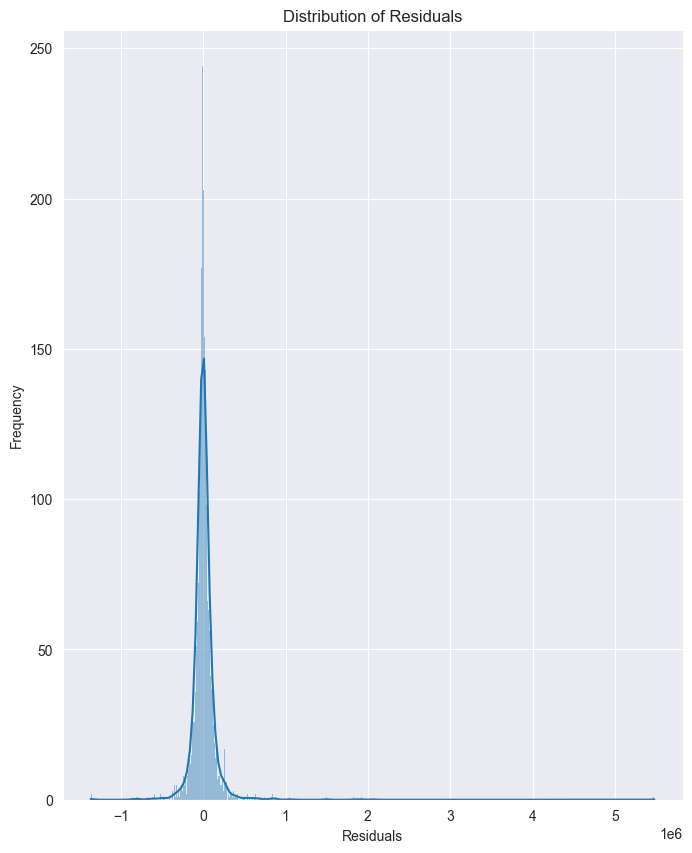

In [156]:
predictions = rf_random.predict(X_test_scaled)

# Histogram 
sns.histplot(y_test - predictions, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

### Accuracy increases when using recommended features in feature selection

# Try it once more, this time using MinMaxScaler

In [157]:
from sklearn.preprocessing import MinMaxScaler

X2 = final_data[["engine","torque","year","transmission_Manual","max_power"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3, random_state = 0) #0.7 train size

from sklearn.ensemble import RandomForestRegressor
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
rf = RandomForestRegressor() 
rf.fit(X_train_scaled, y_train) #fit trained data

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators) #Experiment with different number of trees

from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
# Minimum number of samples
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at leaf node 
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

model_rf = RandomForestRegressor() #base estimator in RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train_scaled,y_train)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=40, max_f

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [158]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) #Average absolute differences
print('MSE:', metrics.mean_squared_error(y_test, predictions)) #Average of the squared differences
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# Assuming you have already fitted the model using RandomizedSearchCV and have the best model
best_rf_model = rf_random.best_estimator_

# Make predictions on the training set and testing set
y_train_pred = best_rf_model.predict(X_train_scaled)
y_test_pred = best_rf_model.predict(X_test_scaled)

# Calculate R-squared for training set and testing set
r2_train_value = r2_score(y_train, y_train_pred)
r2_test_value = r2_score(y_test, y_test_pred)

# Display the R-squared values with two decimal places
print('R-squared Coefficient of determination for training set: {:.5f}'.format(r2_train_value))
print('R-squared Coefficient of determination for testing set: {:.5f}'.format(r2_test_value))

metrics.r2_score(y_test, predictions)

MAE: 75239.53089024892
MSE: 33941941570.108776
RMSE: 184233.38885801556
R-squared Coefficient of determination for training set: 0.98880
R-squared Coefficient of determination for testing set: 0.95226


0.9515286712146646

### Accuracy is about the same

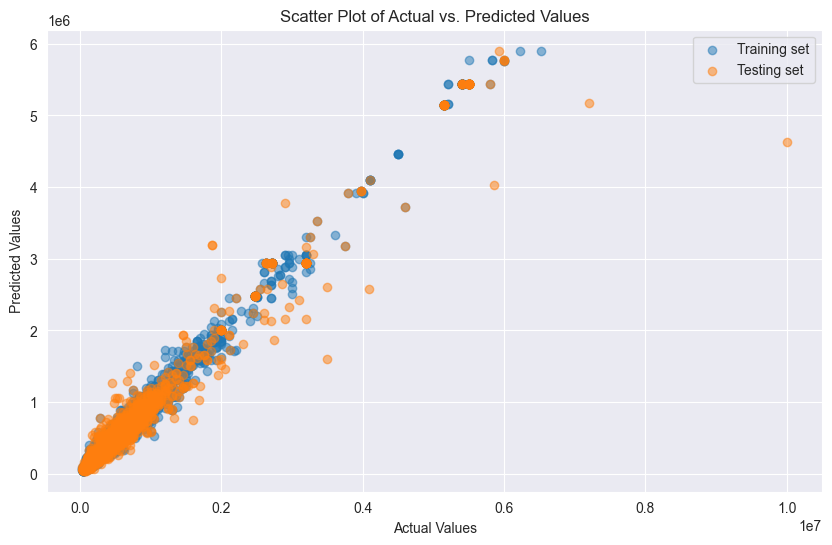

In [159]:
plt.figure(figsize=(10, 6))

plt.scatter(y_train, y_train_pred, label='Training set', alpha=0.5)
plt.scatter(y_test, y_test_pred, label='Testing set', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.legend()
plt.show()

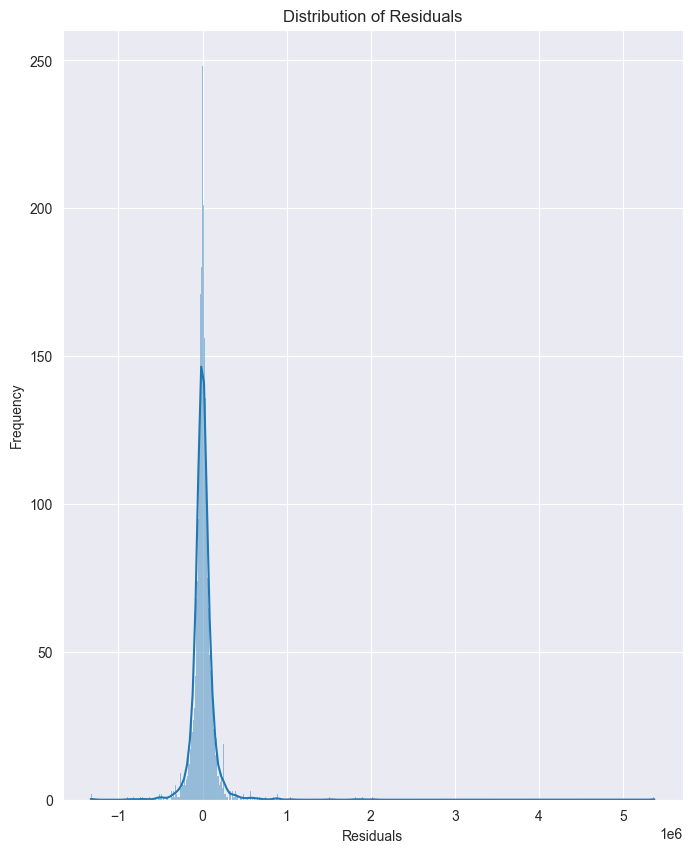

In [160]:
predictions = rf_random.predict(X_test_scaled)

# Histogram 
sns.histplot(y_test - predictions, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# END